In [1]:
#importing libraries

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [5]:
#loading dataset

df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [6]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [11]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [13]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

# data visualisation


<AxesSubplot: xlabel='Bedroom', ylabel='count'>

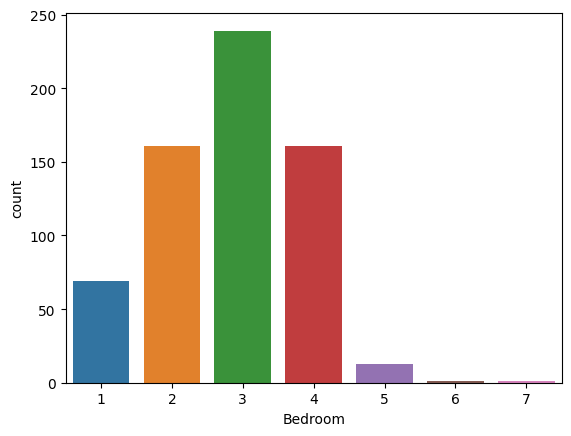

In [24]:
sns.countplot(df,x='Bedroom')

<AxesSubplot: xlabel='Bathroom', ylabel='count'>

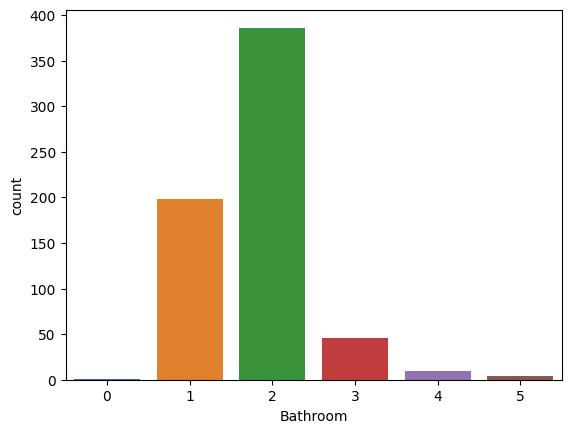

In [25]:
sns.countplot(df,x='Bathroom')

<AxesSubplot: xlabel='Living.Room', ylabel='count'>

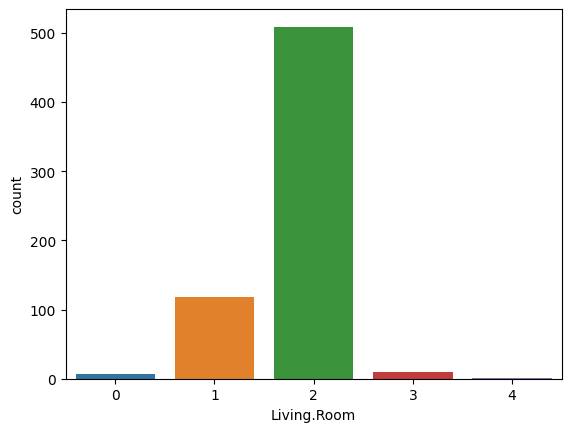

In [26]:
sns.countplot(df,x='Living.Room')

<AxesSubplot: xlabel='Sqft', ylabel='Price'>

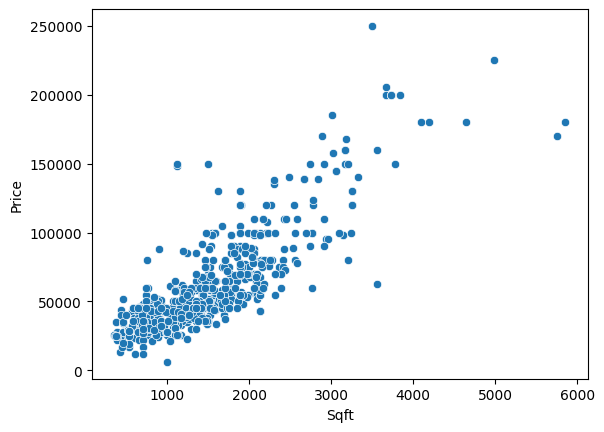

In [32]:
sns.scatterplot(df,x='Sqft',y='Price')

<AxesSubplot: xlabel='Sqft', ylabel='Count'>

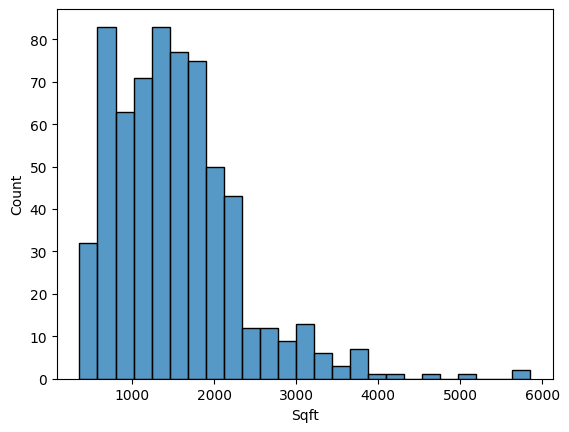

In [33]:
sns.histplot(df,x='Sqft')

<AxesSubplot: xlabel='Price', ylabel='Count'>

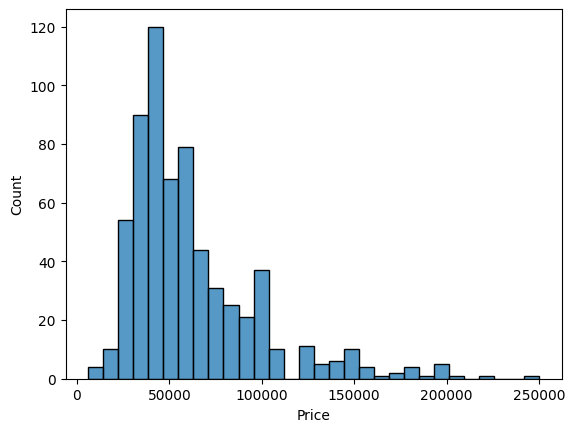

In [34]:
sns.histplot(df,x='Price')

<AxesSubplot: >

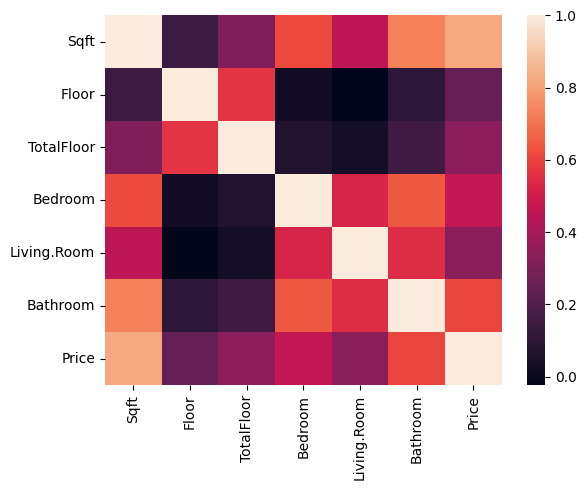

In [31]:
sns.heatmap(df.corr())

In [35]:
df[df['Price']>150000]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
24,3664.740,19,19,3,2,3,200000
26,3664.740,19,19,3,2,3,200000
38,3735.900,19,19,3,2,3,200000
48,3735.900,19,19,3,2,3,200000
54,4643.190,1,6,5,4,4,180000
147,4981.200,3,38,3,2,3,225000
163,4091.700,2,15,3,2,4,180000
242,3173.736,3,9,4,2,3,160000
286,3504.630,13,14,2,2,2,250000
299,3664.740,9,13,5,1,2,206000


<AxesSubplot: xlabel='TotalFloor', ylabel='Price'>

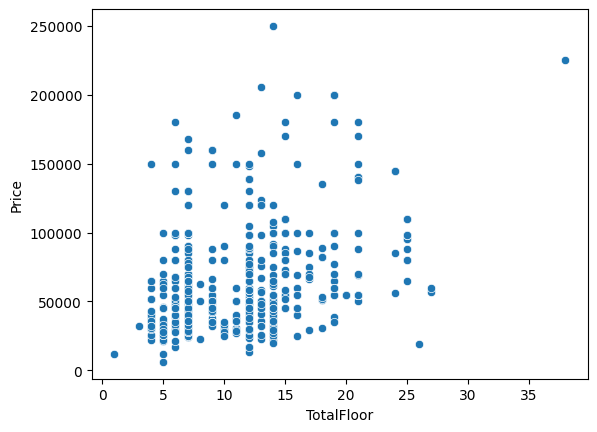

In [37]:
sns.scatterplot(df,x='TotalFloor',y='Price')

In [ ]:
y=df.Price
df=df.drop('Price',axis=1,inplace=True)

In [50]:
y=np.array(y)


In [53]:
X=np.array(df)

# splitting training and testing dataset

In [68]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=7)

In [69]:
rmse_val=[]
for k in range(1,30):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    error=np.sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value of k=',k,'is :',error)

RMSE value of k= 1 is : 18844.26586798452
RMSE value of k= 2 is : 15842.210674608688
RMSE value of k= 3 is : 16556.30228863358
RMSE value of k= 4 is : 17058.329814281846
RMSE value of k= 5 is : 17413.548046713837
RMSE value of k= 6 is : 17726.209776505766
RMSE value of k= 7 is : 17799.637755140913
RMSE value of k= 8 is : 18029.986090429134
RMSE value of k= 9 is : 18032.253005339066
RMSE value of k= 10 is : 17634.55195233563
RMSE value of k= 11 is : 17481.113524837303
RMSE value of k= 12 is : 17339.28878586532
RMSE value of k= 13 is : 17433.265324718883
RMSE value of k= 14 is : 17288.9300440402
RMSE value of k= 15 is : 17133.456927946096
RMSE value of k= 16 is : 16994.64023427862
RMSE value of k= 17 is : 16961.00689117771
RMSE value of k= 18 is : 17085.234817918074
RMSE value of k= 19 is : 17176.448820250975
RMSE value of k= 20 is : 17172.070602271284
RMSE value of k= 21 is : 17145.080199034983
RMSE value of k= 22 is : 17018.70839391866
RMSE value of k= 23 is : 16952.444638809524
RMSE v

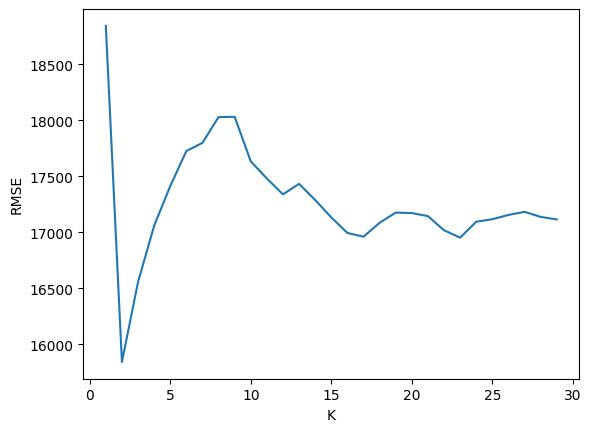

In [70]:
# Plot
k_range = range(1,30)
plt.plot(k_range, rmse_val)
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

In [71]:
from sklearn.metrics import r2_score
r2_val=[]
for k in range(1,30):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    r2_val.append(r2)
    print('R2 value of k=',k,'is :',r2)

R2 value of k= 1 is : 0.6579486737138737
R2 value of k= 2 is : 0.7582511584766956
R2 value of k= 3 is : 0.7359661992886276
R2 value of k= 4 is : 0.7197111337443145
R2 value of k= 5 is : 0.7079162673977297
R2 value of k= 6 is : 0.697333327658149
R2 value of k= 7 is : 0.6948206379940101
R2 value of k= 8 is : 0.6868707655652135
R2 value of k= 9 is : 0.6867920209726519
R2 value of k= 10 is : 0.7004552636038377
R2 value of k= 11 is : 0.7056452697841016
R2 value of k= 12 is : 0.7104021105127492
R2 value of k= 13 is : 0.7072544428643643
R2 value of k= 14 is : 0.7120818342410443
R2 value of k= 15 is : 0.7172368395689803
R2 value of k= 16 is : 0.721800219241941
R2 value of k= 17 is : 0.7229002754648483
R2 value of k= 18 is : 0.7188262733680773
R2 value of k= 19 is : 0.7158160200359305
R2 value of k= 20 is : 0.7159608766183365
R2 value of k= 21 is : 0.7168530585607464
R2 value of k= 22 is : 0.7210116767394743
R2 value of k= 23 is : 0.7231799757114974
R2 value of k= 24 is : 0.7185182026453175
R2 

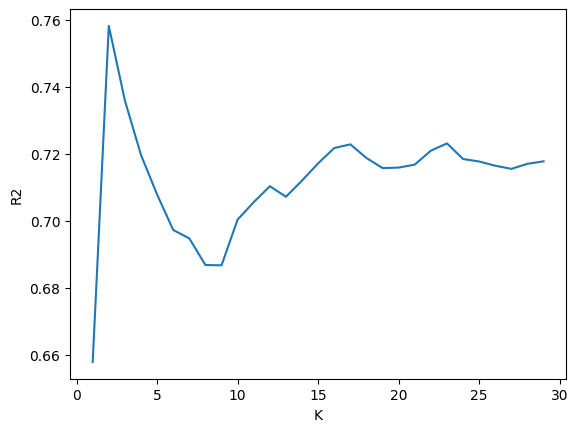

In [72]:
# Plot
k_range = range(1,30)
plt.plot(k_range,r2_val)
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

In [73]:
# Optimal Model
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train,y_train)
pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
r2= r2=r2_score(y_test,pred)
print('RMSE : ', error)
print('R2 : ',r2)

RMSE :  15842.210674608688
R2 :  0.7582511584766956
